In [1]:
# imports
import os
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# import re

from sklearn.model_selection import train_test_split
import sklearn.preprocessing

# import to use min max scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer

# sql ace credentials
import env
import wrangle as wr


In [2]:
df = wr.wrangle_zillow()

In [3]:
train, validate, test = wr.split_data(df)

(1198531, 7) (513657, 7) (428047, 7)


# min max scaler

In [4]:
train_scaled = train.copy()

In [5]:
# make, fit, use:
values = ['bedrooms', 'bathrooms','tax_amount', 'sq_feet']
# make the object, put it into the variable scaler
scaler = MinMaxScaler()
# fit the object to my data:
train_scaled[values] = scaler.fit_transform(train[values])

In [6]:
train.head()

,bedrooms,bathrooms,sq_feet,tax_value,year_built,tax_amount,fips
1558699,3,1.0,1248,191578,1950,2712.21,6037
1211052,2,2.0,1326,1345206,1950,16539.04,6037
337618,2,1.0,1053,356648,1953,4575.16,6037
1011206,3,2.0,1256,175069,1946,2635.51,6037
40005,3,2.0,1640,543000,1957,6344.96,6059


In [7]:
train_scaled.head()

,bedrooms,bathrooms,sq_feet,tax_value,year_built,tax_amount,fips
1558699,0.200000,0.03125,0.001309,191578,1950,0.002510,6037
1211052,0.133333,0.06250,0.001391,1345206,1950,0.015335,6037
337618,0.133333,0.03125,0.001104,356648,1953,0.004238,6037
1011206,0.200000,0.06250,0.001317,175069,1946,0.002439,6037
40005,0.200000,0.06250,0.001721,543000,1957,0.005879,6059


Text(0, 0.5, 'Count')

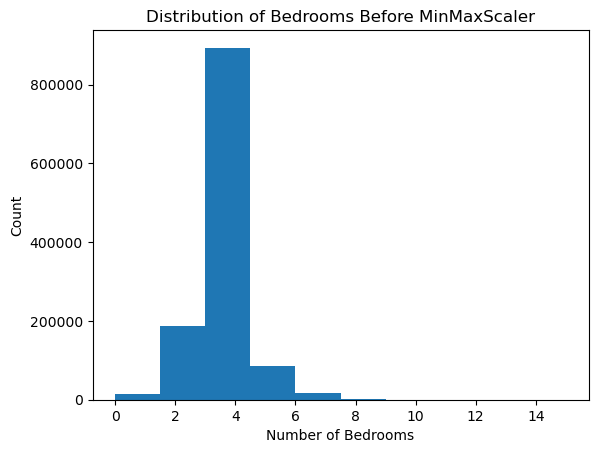

In [8]:
plt.hist(train.bedrooms)
plt.title('Distribution of Bedrooms Before MinMaxScaler')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

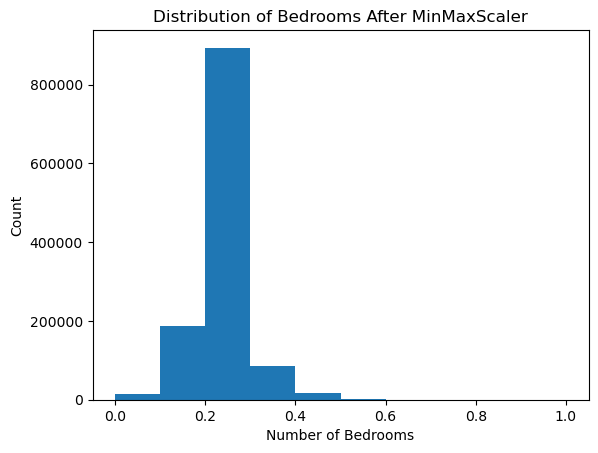

In [9]:
plt.hist(train_scaled.bedrooms)
plt.title('Distribution of Bedrooms After MinMaxScaler')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')

In [10]:
def distributions( scaler, df , values, bins = 30):
    df_scaled = df.copy()
    df_scaled[values] = scaler.fit_transform(df[values])
    
    for col in df.columns:
        plt.figure(figsize = (6,6))
    
        plt.hist(df[col],bins = bins)
    
        plt.title(f'{col} before scaling')
        
        plt.show()
    
        plt.hist(df_scaled[col], bins = bins)
    
        plt.title(f'{col} after scaling')
    
        plt.show()
        
        
        #  ax1.set(title=f'{col} before scaling', xlabel=col, ylabel='count')

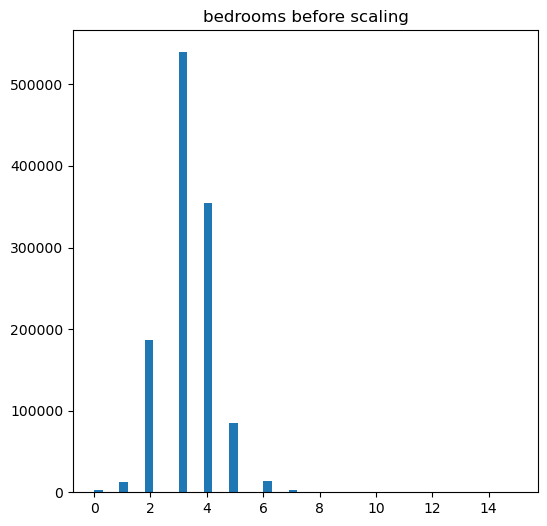

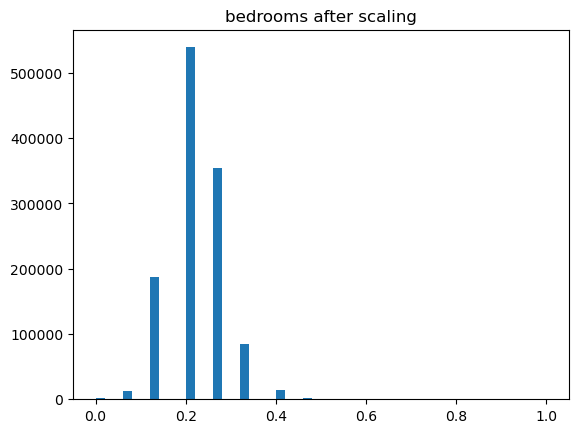

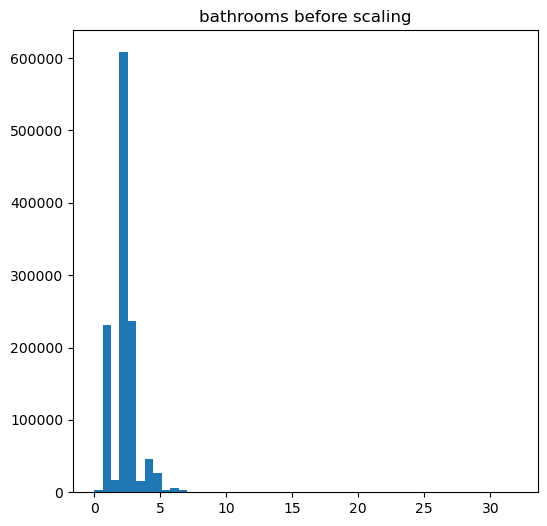

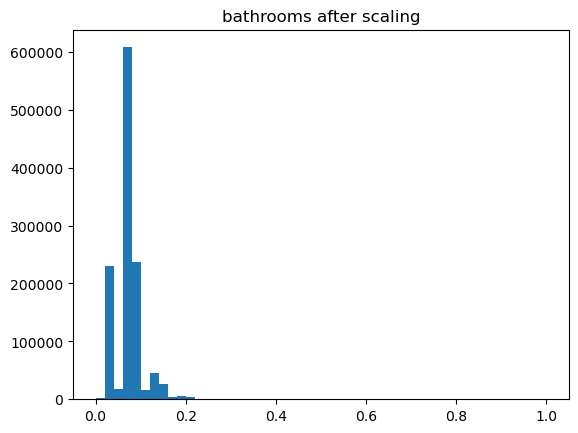

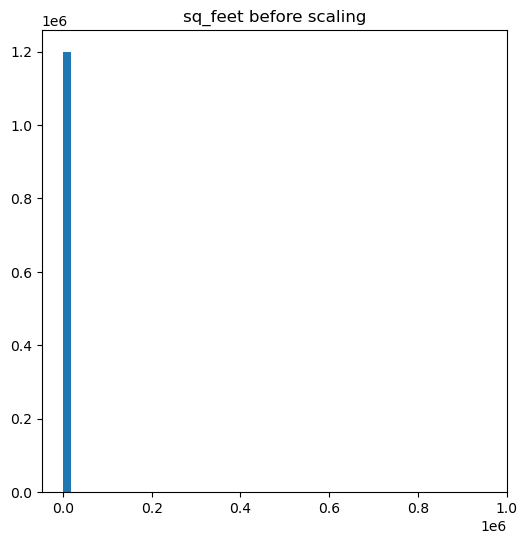

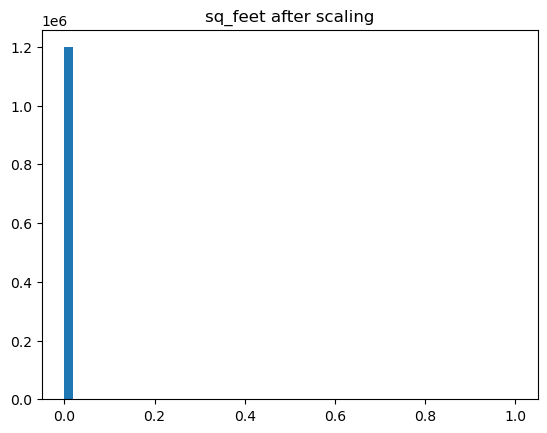

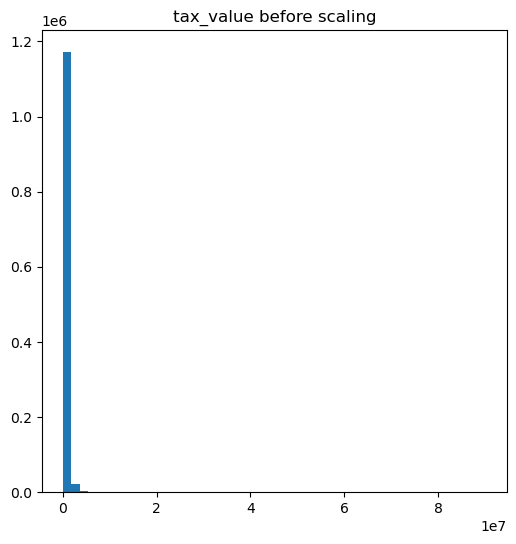

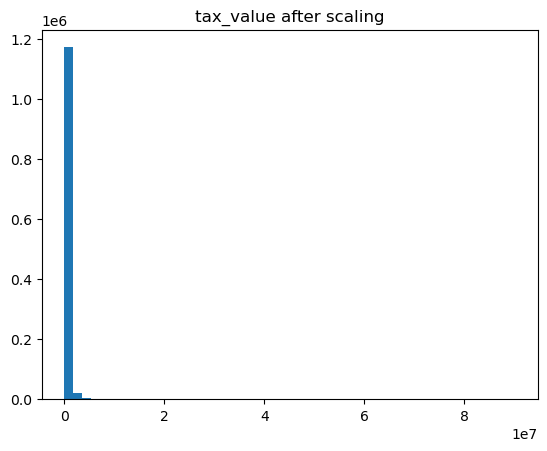

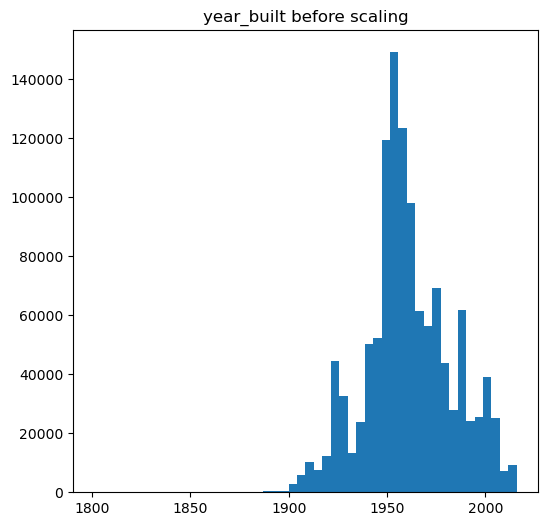

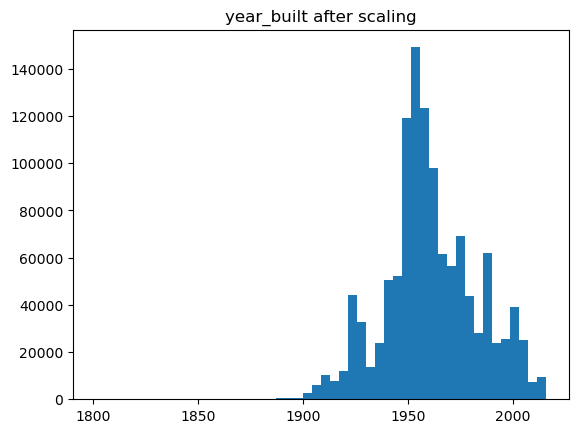

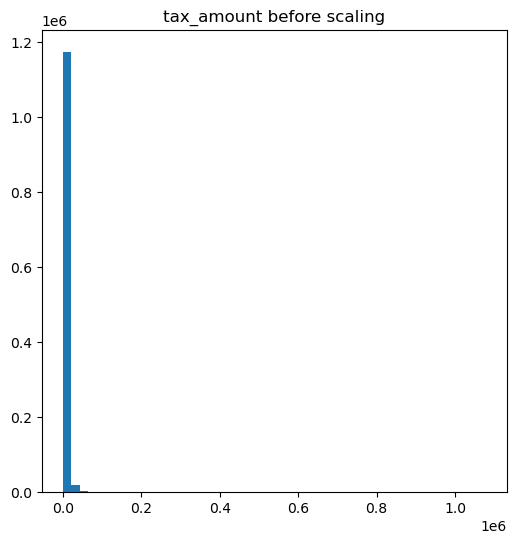

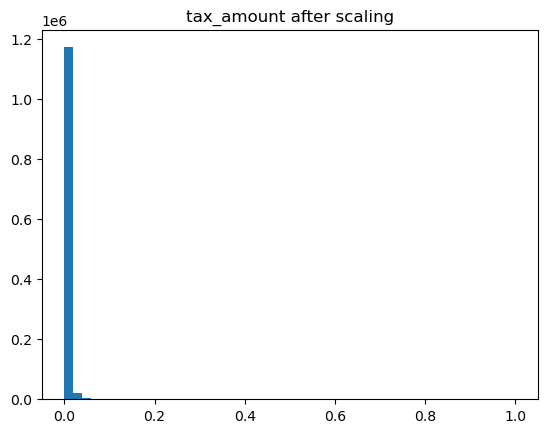

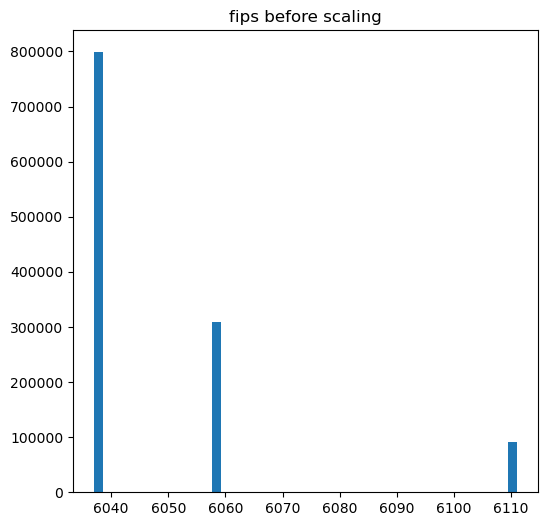

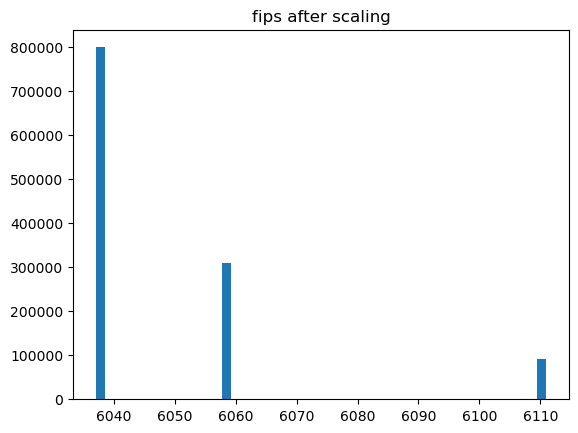

In [11]:
distributions(scaler=MinMaxScaler(), 
                 df=train, 
                 values=values, 
                 bins=50)

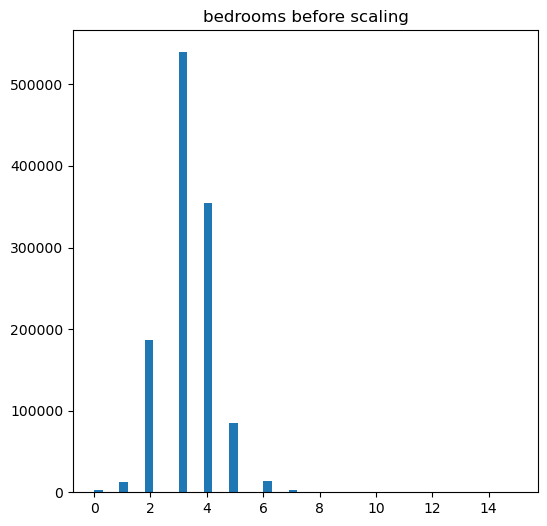

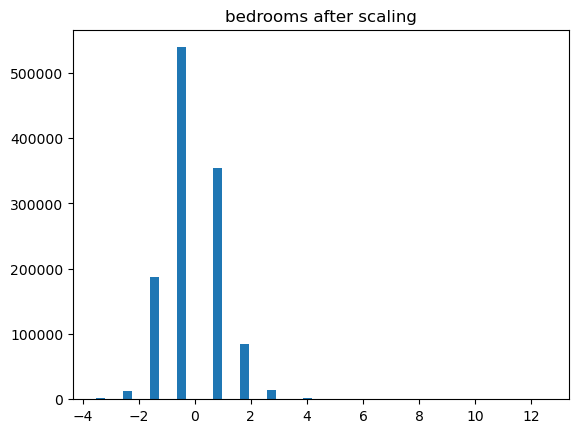

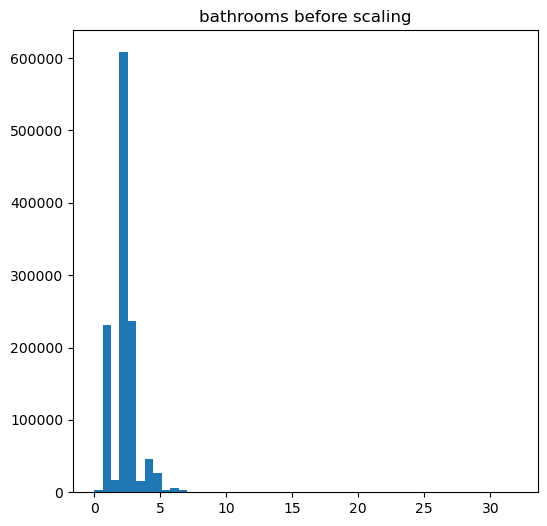

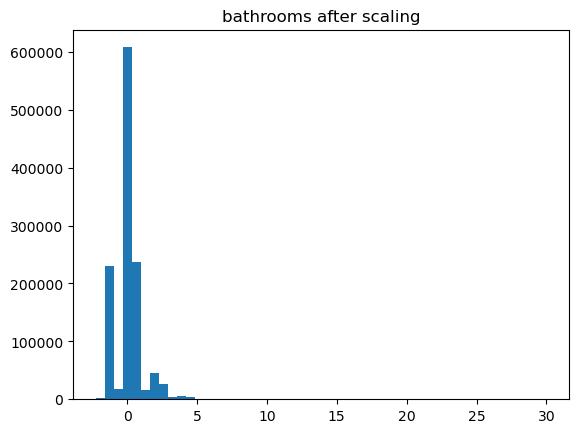

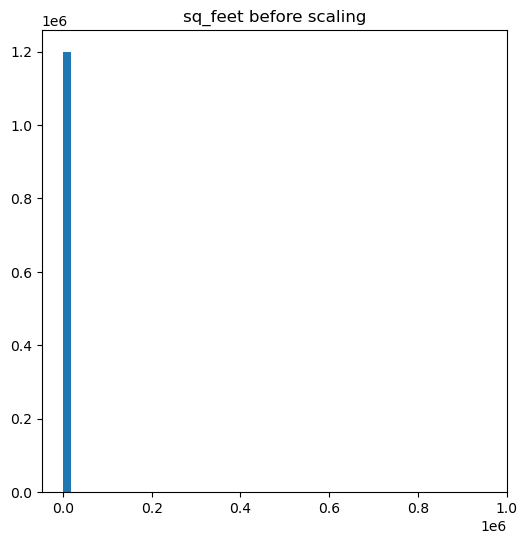

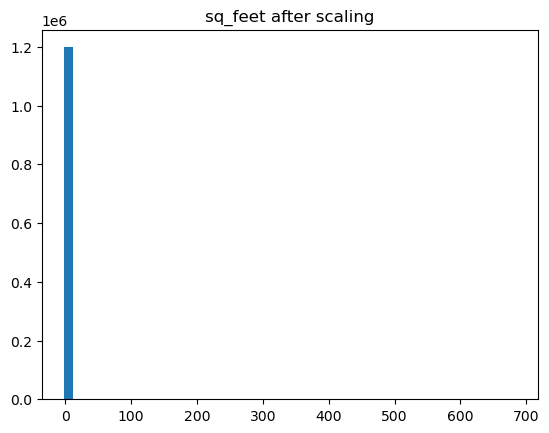

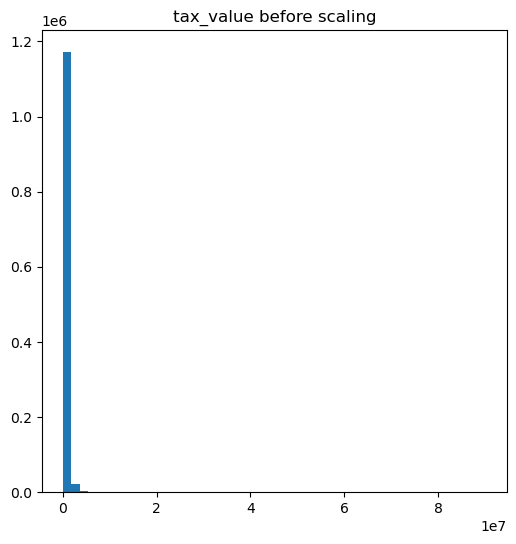

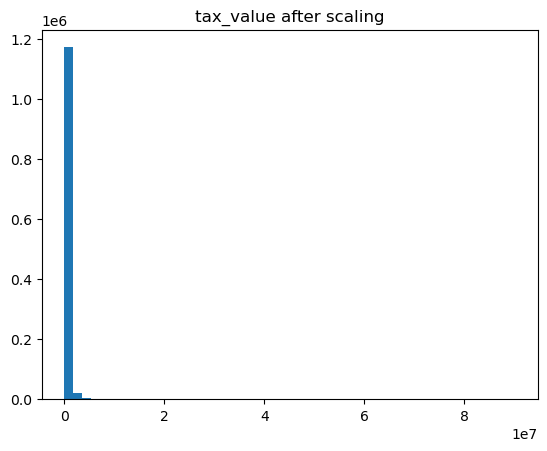

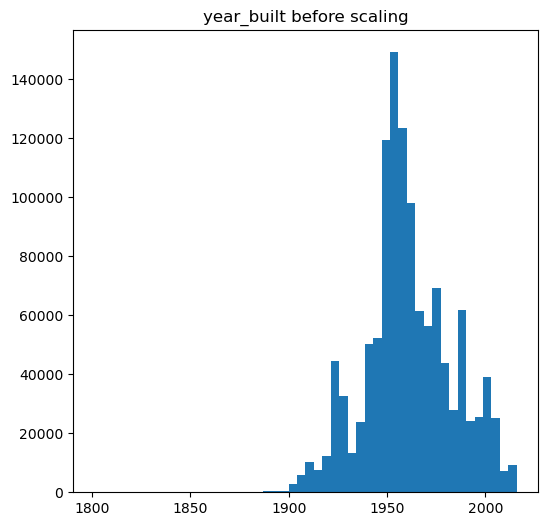

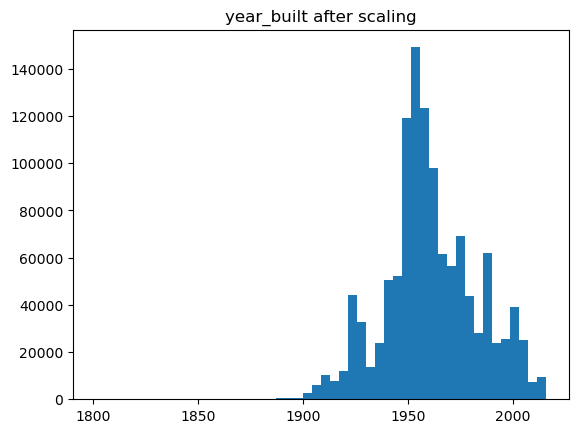

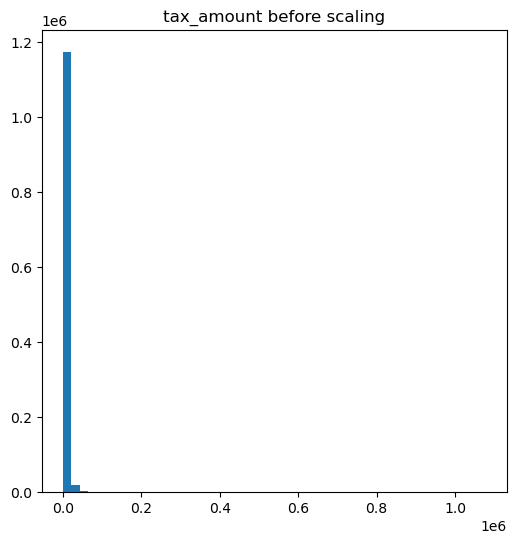

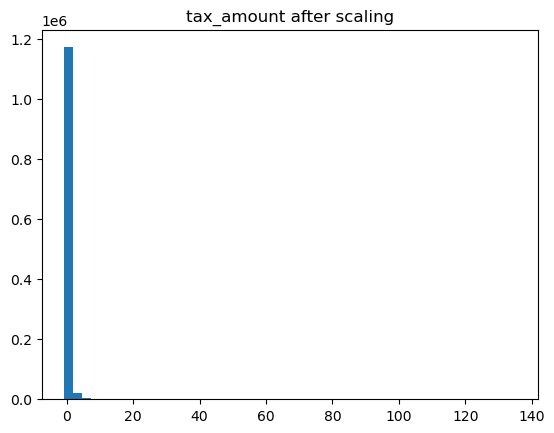

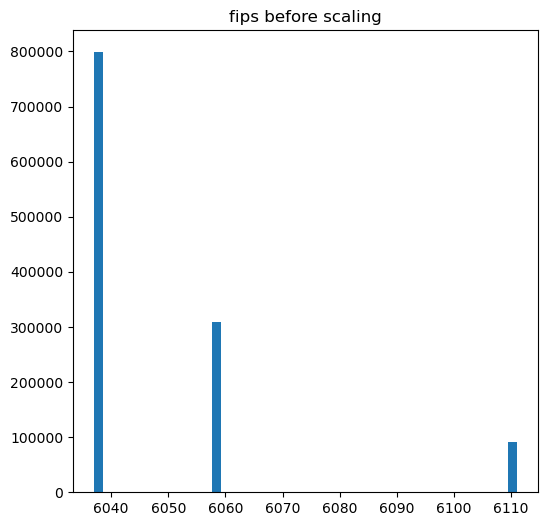

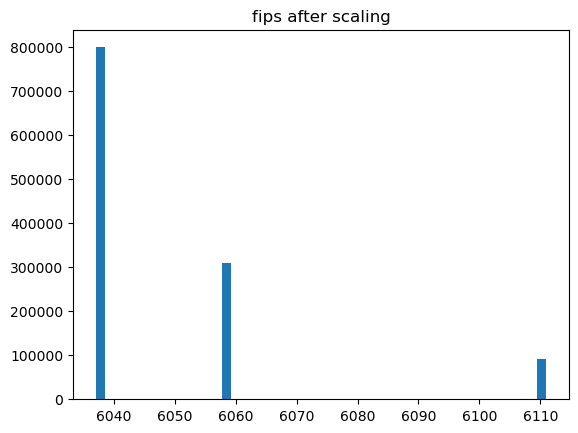

In [12]:
# Standard Scaler Applied
distributions(scaler=StandardScaler(), 
                 df=train, 
                 values=values, 
                 bins=50)

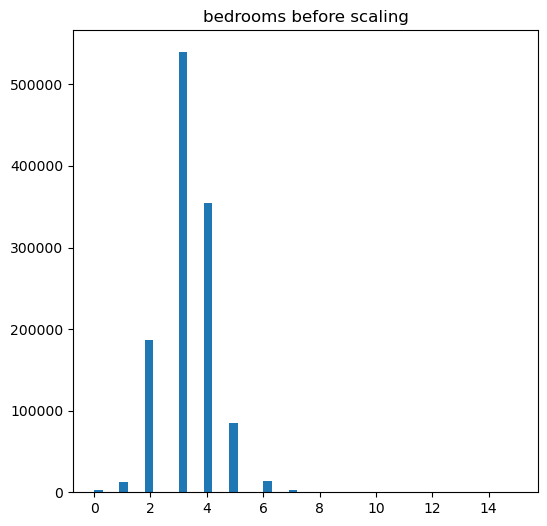

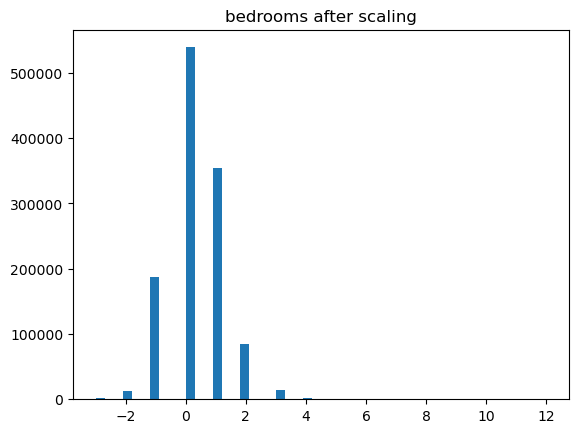

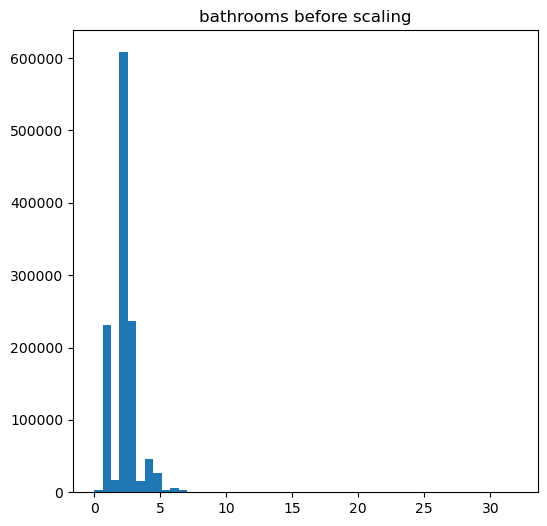

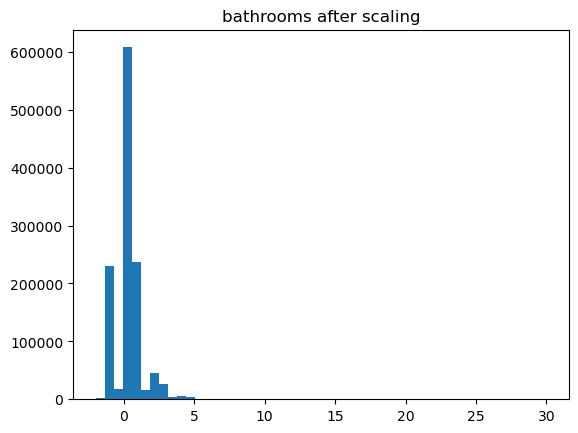

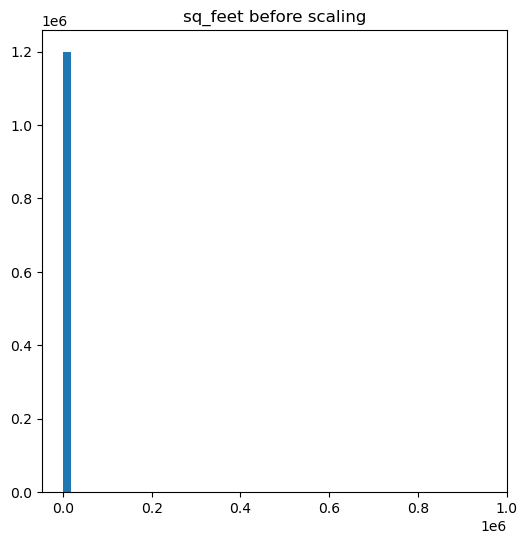

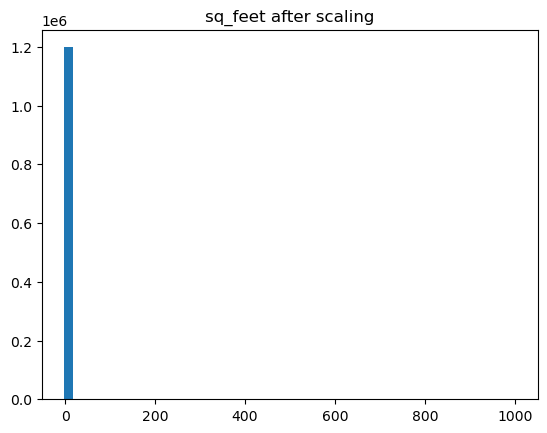

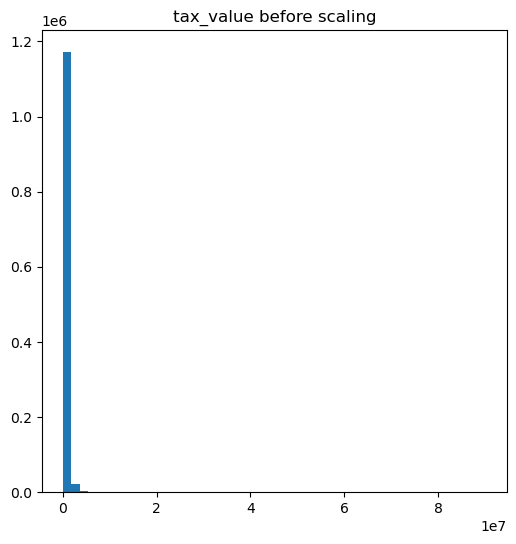

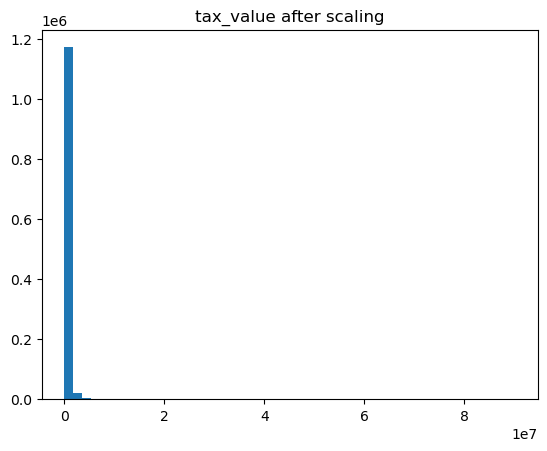

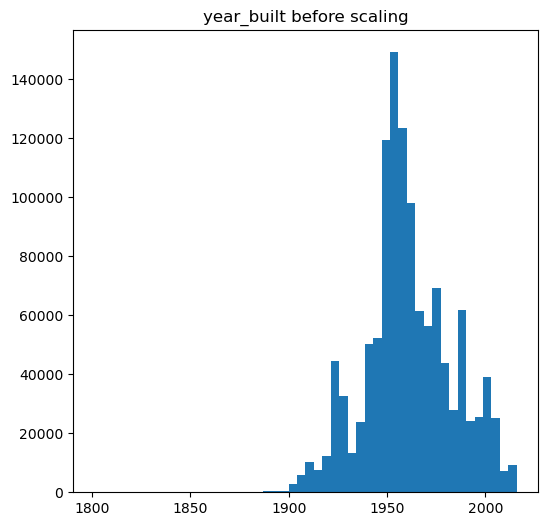

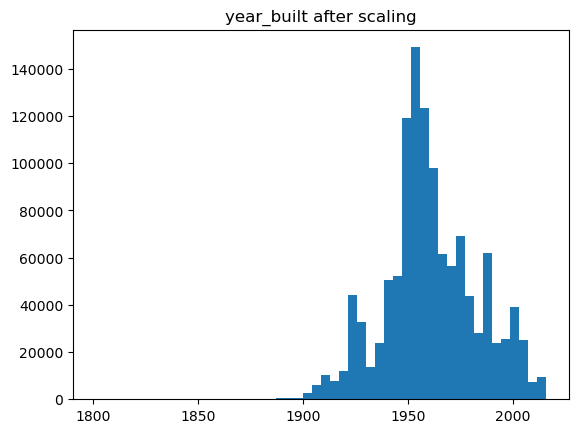

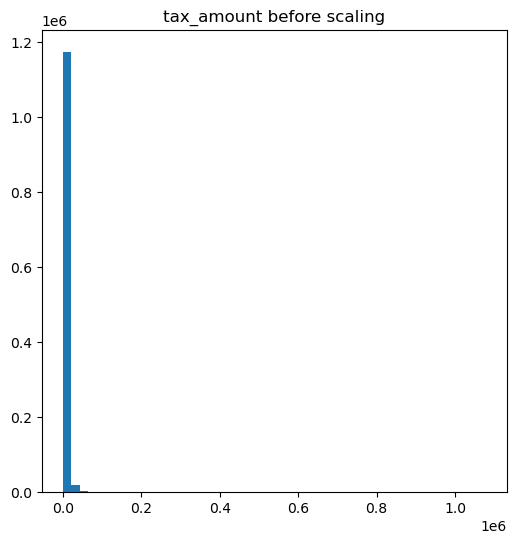

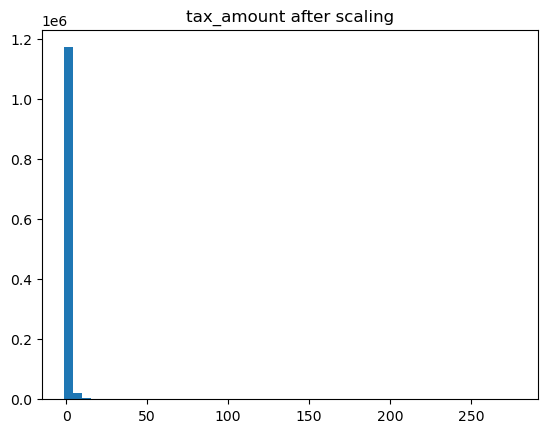

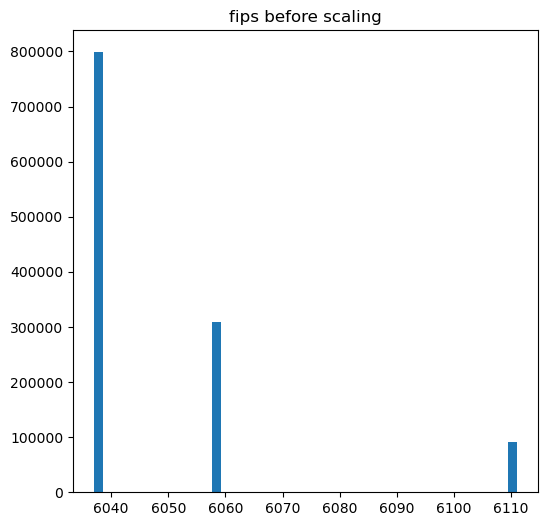

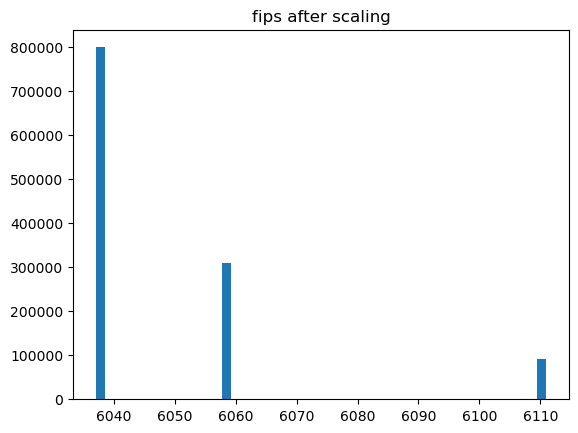

In [13]:
# Standard Scaler Applied
distributions(scaler=RobustScaler(), 
                 df=train, 
                 values=values, 
                 bins=50)

In [14]:
scaler = MinMaxScaler()
original_data = train[['tax_amount']]
scaled_data = scaler.fit_transform(original_data)

In [15]:
scaled_data[:5]

array([[0.00250986],
       [0.0153351 ],
       [0.00423786],
       [0.00243872],
       [0.00587946]])

In [16]:
original_data[:5]

,tax_amount
1558699,2712.21
1211052,16539.04
337618,4575.16
1011206,2635.51
40005,6344.96


In [17]:
scaler.inverse_transform(scaled_data)[:5]

array([[ 2712.21],
       [16539.04],
       [ 4575.16],
       [ 2635.51],
       [ 6344.96]])

In [18]:
# that seems to reverse as if they had not been scaled.

# read documentation for sklearns quantile transformer. visualize the data scaling

In [ ]:
# use the quantile transform but omit the out put distrubution argument.

In [ ]:
# QuantileTransformer Applied
distributions(scaler=QuantileTransformer(), 
                 df=train, 
                 values=values, 
                 bins=50)

* Based on the work you've done,  choose a scaling method for your dataset. Write a function within your   prepare.py that accepts as input the train, validate, and test data   splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!


In [ ]:
def scale_data(train, 
               validate, 
               test, 
               values=['bedrooms', 'bathrooms', 'tax_amount', 'sq_feet'],
               return_scaler=False):
    '''
    Scales the 3 data splits. 
    Takes in train, validate, and test data splits and returns their scaled counterparts.
    If return_scalar is True, the scaler object will be returned as well
    '''
    # make copies of our original data so we dont gronk up anything
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()
    #     make the thing
    scaler = MinMaxScaler()
    #     fit the thing
    scaler.fit(train[values])
    # applying the scaler:
    train_scaled[values] = pd.DataFrame(scaler.transform(train[values]),
                                                  columns=train[values].columns.values).set_index([train.index.values])
                                                  
    validate_scaled[values] = pd.DataFrame(scaler.transform(validate[values]),
                                                  columns=validate[values].columns.values).set_index([validate.index.values])
    
    test_scaled[values] = pd.DataFrame(scaler.transform(test[values]),
                                                 columns=test[values].columns.values).set_index([test.index.values])
    
    if return_scaler:
        return scaler, train_scaled, validate_scaled, test_scaled
    else:
        return train_scaled, validate_scaled, test_scaled

In [ ]:

scaler, train_scaled, validate_scaled, test_scaled = scale_data(train, validate, test, return_scaler=True)

In [ ]:
scaler

In [ ]:
train_scaled

In [ ]:
validate_scaled

In [ ]:
test_scaled

In [ ]:
train.head()

In [ ]:
validate.head()

In [ ]:
test.head()

In [ ]:
for col in x_train_scaled.columns:
    plt.hist(x_train_scaled[col],bins = 50)
    plt.title(f'{col} distribution')
    plt.show()

In [ ]:
for col in x_train.columns:
    plt.hist(x_train[col], bins = 50)
    plt.title(f'{col} distribution')
    
    plt.show()

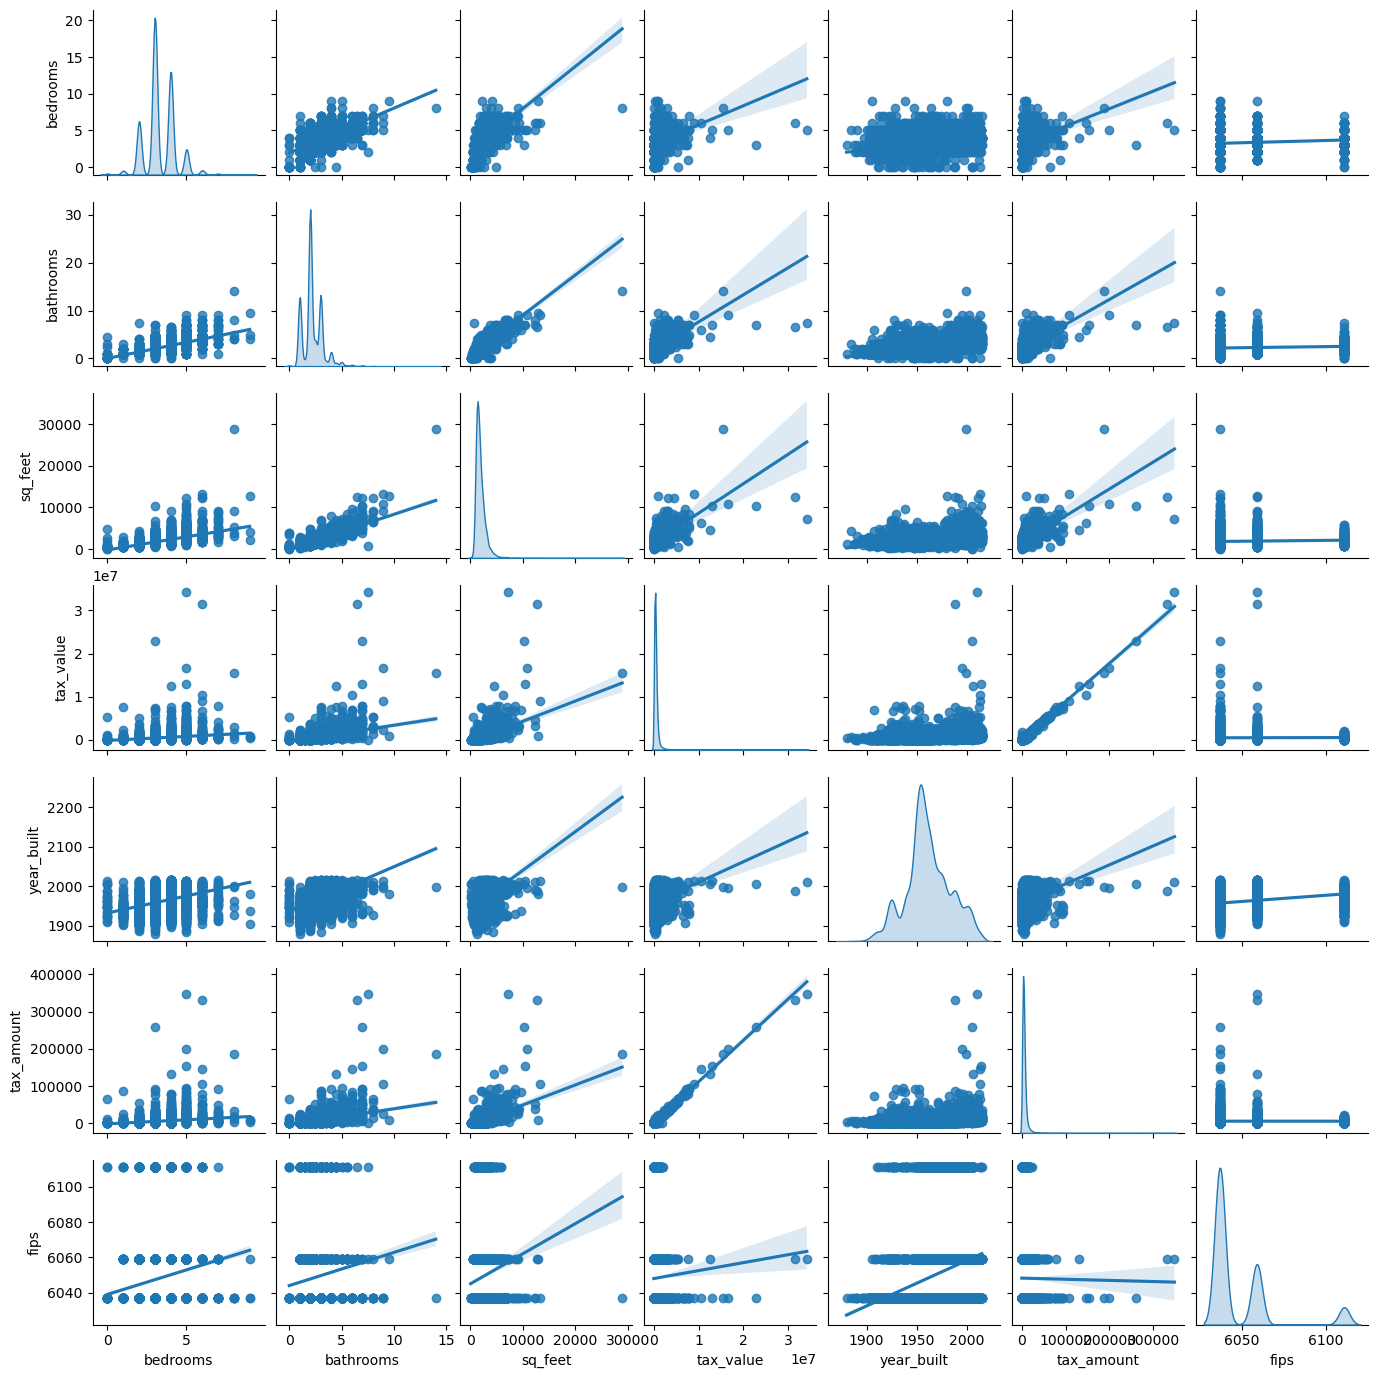

In [22]:
# returns pairplot image due to data quantity making a pairplot function take to long.
wr.plot_variable_pairs(train)